# DataSets & DataLoaders 

In [18]:
#matplotib inline 

import torch
import torchvision 
import torchvision.transforms as transforms 

## Open-Access Datasets from TorchVision 

In [19]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5, 0.5, 0.5))]
)

Two transformations for input we specified: 

- ```transforms.ToTensor()``` converts images loaded by Pillow into PyTorch tensors. This operations turns the grid of integers representing the image into decimals between 0 and 1.  

- ```transforms.Normalize()``` adjusts the values of the tensor so that their average is zero and their standard deviation is 0.5. Most activation functions have their strongest gradients around x = 0. SO centering our data there can speed learrning. We are taking the converted decimals and centering them around 0 with an std of 0.5. 

formula used to normalize: 
$$\text{output} = \frac{\text{input} - \text{mean}}{\text{std}}$$

Other transforms are available such as cropping, centering, rotation, and reflection. 

Now we are creating an instance of the CIRFA10 dataset. Set of 32x32 color image tiles representing 10 classes of objects: 6 animals (bird, cat, deer, dog, frog, horse) and 4 cars (airplane, automobile, ship, and truck).

In [20]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                       download=True, transform=transform)


When instantiating dataset we need to tell it a few things: 

- filesystem path to where we want the data to go 

- Whether or not we are using this set for training. Most datasets will be split into training and test subsets

- Whether we would like to download the dataset if we haven't already

## DataLoader 
Once the dataset is downloaded we can pass it to the dataloader 

In [21]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)


A ```Dataset``` subclass wraps access to the data, and is specialized to the type of data it's serving. The ```DataLoader``` knows nothing about the data, but organizes the input tensors served by the ```Dataset``` into batches with the parameters we specify. 

In the above example we have asked a DataLoader to give us batches of 4 images from the ```trainset```, randomizing their order (```shuffle=True```), and we told it to create two workers to load data from the disk. 

Good practice: visualize the batches your ```DataLoader``` serves:

 deer  ship   cat   dog


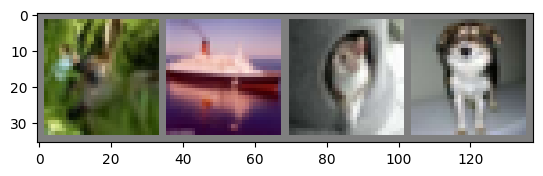

In [22]:
import matplotlib.pyplot as plt 
import numpy as np 

classes = ('plane', 'car', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 
           'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5 # unnormalize 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get random training images 
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images 
imshow(torchvision.utils.make_grid(images))
#print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))